In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
# Zillow Home Value Index (Zip): Zillow Rental Index Per Square Foot - All Homes - 80222, Denver, CO
file1 = 'zillow/ZILLOW-Z80222_ZRIFAH.csv'
raw1_df = pd.read_csv(file1)
raw1_df.head()

,Date,Value
0,2018-08-31,1.620
1,2018-07-31,1.618
2,2018-06-30,1.618
3,2018-05-31,1.614
4,2018-04-30,1.610


In [3]:
# Unique_City_ID    25341
file2 = 'zillow/cities_crosswalk.csv'
raw2_df = pd.read_csv(file2)
#  raw2_df.count() 25341 rows
raw2_df.head()

,Unique_City_ID,City,County,State
0,oak_grovechristianky,Oak Grove,Christian,KY
1,jarvisburgcurritucknc,Jarvisburg,Currituck,NC
2,mcminnvilleyamhillor,McMinnville,Yamhill,OR
3,union_townshiperiepa,Union Township,Erie,PA
4,oshkoshwinnebagowi,Oshkosh,Winnebago,WI


In [4]:
file3 = 'statistical_neighborhoods.csv'
raw3_df = pd.read_csv(file3)
# raw3_df.count() 78 neighbourhood
raw3_df.head()

,NBHD_ID,NBHD_NAME,TYPOLOGY,NOTES
0,2,Auraria,NaN,NaN
1,21,Cory - Merrill,NaN,NaN
2,7,Belcaro,NaN,NaN
3,70,Washington Park,NaN,NaN
4,71,Washington Park West,NaN,NaN


In [5]:
file4 = 'zillow/City_time_series.csv'
raw4_df = pd.read_csv(file4)
# raw4_df.count() 3.76 million rows by 81 cols
# could not perform last operation

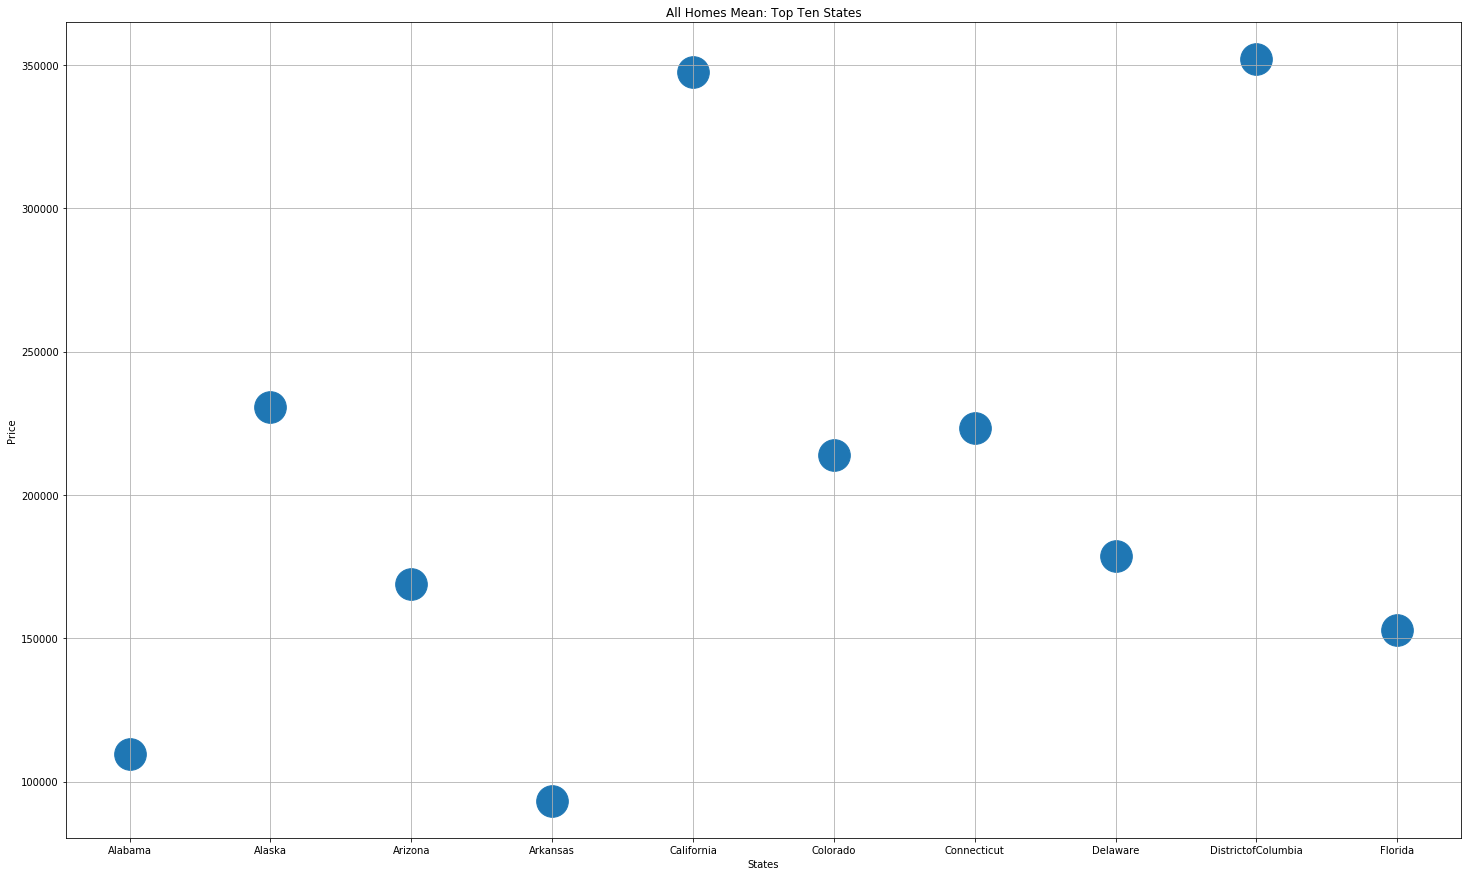

In [6]:
file5 = 'zillow/State_time_series.csv'
raw5_df = pd.read_csv(file5)
# raw5_df.count() 12,438 homes for ZHVI_All_Homes
# raw5_df['ZHVI_AllHomes'].mean() $ 169,753.41 169753.4089081846
state_df = raw5_df.copy()
statesall_mean = state_df.groupby(['RegionName'])['ZHVI_AllHomes'].mean()
# pre-styling scatter plot
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("All Homes Mean: Top Ten States")
plt.xlabel("States")
plt.ylabel("Price")
#  total of 50 states available
# plt.scatter(statesall_mean.sort_values().index[:10], statesall_mean.sort_values()[:10])
plt.scatter(statesall_mean.index[:10], statesall_mean[:10], s=1000)
plt.show()

In [7]:
# statesall_mean.head() timestamps format Alabama     1996-04-30    79500.0
# Year needs to be extracted in order to determine increase per year
# state_df['Date'].head()

state_df['dt_Date'] = pd.to_datetime(state_df['Date'])
# state_df['dt_Date'].count() 13212
state_df['Year'] = state_df['dt_Date'].dt.year
# state_df['Year'] will be required for next groupby object

# state_df['Year'].unique()
# array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
#        2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

# state_df.groupby(['RegionName', 'Year'])['ZHVI_AllHomes'].mean() returns an array
dummyst = state_df.groupby(['RegionName', 'Year'])['ZHVI_AllHomes'].mean()
stateMeanYear_df = dummyst.reset_index()
stateMeanYear_df
# pivoted the table with years on index, states on columns and average home price as values
stateMeanYear_pdf = stateMeanYear_df.pivot(index='Year', columns = 'RegionName', values = 'ZHVI_AllHomes')
stateMeanYear_pdf.head()

RegionName,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,DistrictofColumbia,Florida,...,Tennessee,Texas,UnitedStates,Utah,Vermont,Virginia,Washington,WestVirginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1996,79866.666667,NaN,104633.333333,64355.555556,157322.222222,129500.000000,132900.000000,108511.111111,NaN,86577.777778,...,71577.777778,NaN,NaN,128577.777778,NaN,112666.666667,135444.444444,39866.666667,NaN,NaN
1997,81358.333333,NaN,108308.333333,66833.333333,161108.333333,135083.333333,136050.000000,110466.666667,NaN,88908.333333,...,75366.666667,83254.545455,NaN,136891.666667,NaN,114633.333333,141700.000000,40833.333333,100900.000000,NaN
1998,84950.000000,175466.666667,113850.000000,69150.000000,172341.666667,142775.000000,141525.000000,113791.666667,NaN,92833.333333,...,80933.333333,86433.333333,NaN,142483.333333,NaN,117650.000000,150558.333333,43800.000000,104900.000000,99277.777778
1999,89475.000000,171400.000000,118933.333333,70075.000000,188500.000000,155775.000000,150075.000000,117200.000000,130114.285714,97658.333333,...,84633.333333,91733.333333,NaN,148733.333333,NaN,122183.333333,159308.333333,46391.666667,111566.666667,102333.333333
2000,91941.666667,174025.000000,127208.333333,72400.000000,215966.666667,174233.333333,163558.333333,124816.666667,144600.000000,105441.666667,...,87491.666667,95725.000000,NaN,157333.333333,NaN,129950.000000,168591.666667,48100.000000,116650.000000,109125.000000


# State Data Visualization by Average

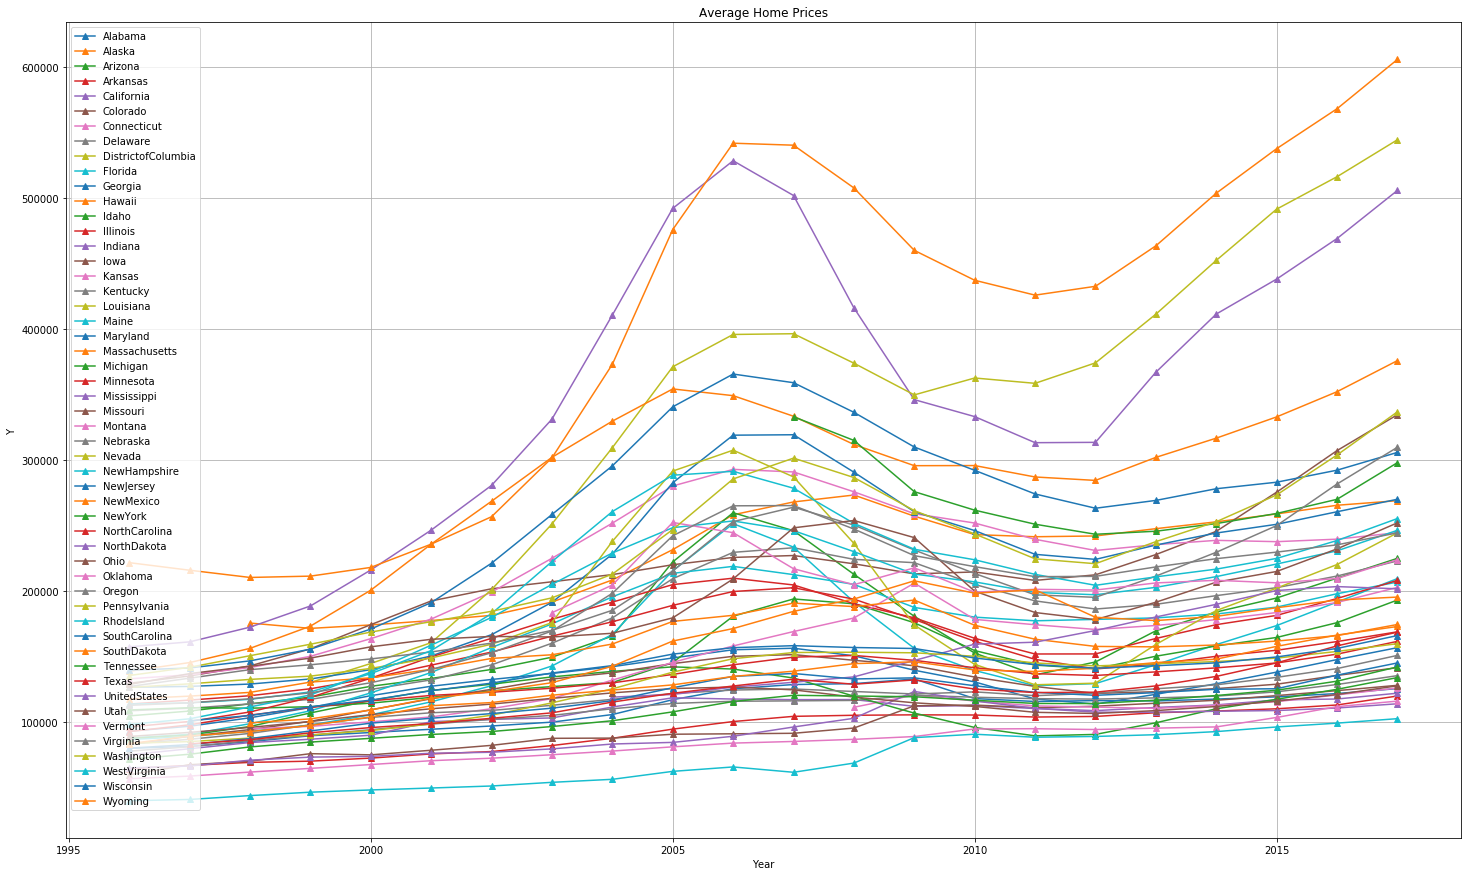

In [29]:
# pre-styling plot
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices")
plt.xlabel("Year")
plt.ylabel(" Y ")

for state in stateMeanYear_pdf.columns:
    plt.plot(stateMeanYear_pdf.index, stateMeanYear_pdf[state], marker = '^',label=state)
    plt.legend(loc='best')
plt.show()

In [31]:
# type(stateMeanYear_pdf.mean().sort_values(ascending=False)) returns series
stateavgsorted_list = stateMeanYear_pdf.mean().sort_values(ascending=False)
stateavgsorted_listTT = stateavgsorted_list[:11]
stateavgsorted_listTTindex = stateavgsorted_listTT.index[:11]
stateavgsorted_listTTindex
# stateavgsorted_listTT

Index(['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts',
       'NewYork', 'NewJersey', 'Alaska', 'Washington', 'Connecticut',
       'Maryland', 'Colorado'],
      dtype='object', name='RegionName')

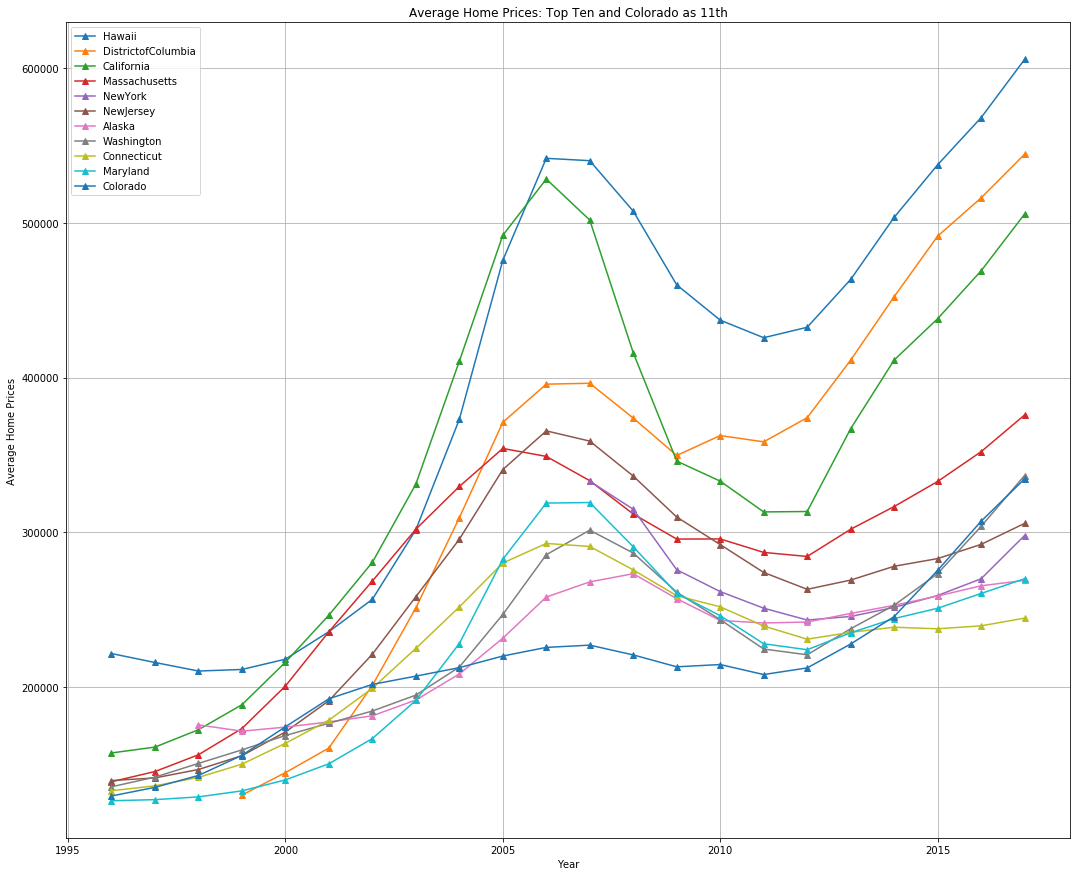

In [45]:
# pre-styling plot
plt.figure(figsize=(18,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: Top Ten and Colorado as 11th")
plt.xlabel("Year")
plt.ylabel(" Average Home Prices ")

# not preferred: use .index and create a for loop before submit!!!!!
# stateMeanYear_TTpdf =stateMeanYear_pdf[['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts', 'NewYork', 'NewJersey', 'Alaska', 'Washington', 'Connecticut', 'Maryland', 'Colorado']]

for state in stateMeanYear_TTpdf.columns:
    plt.plot(stateMeanYear_TTpdf.index, stateMeanYear_TTpdf[state], marker = '^',label=state)
    plt.legend(loc='best')
plt.show()

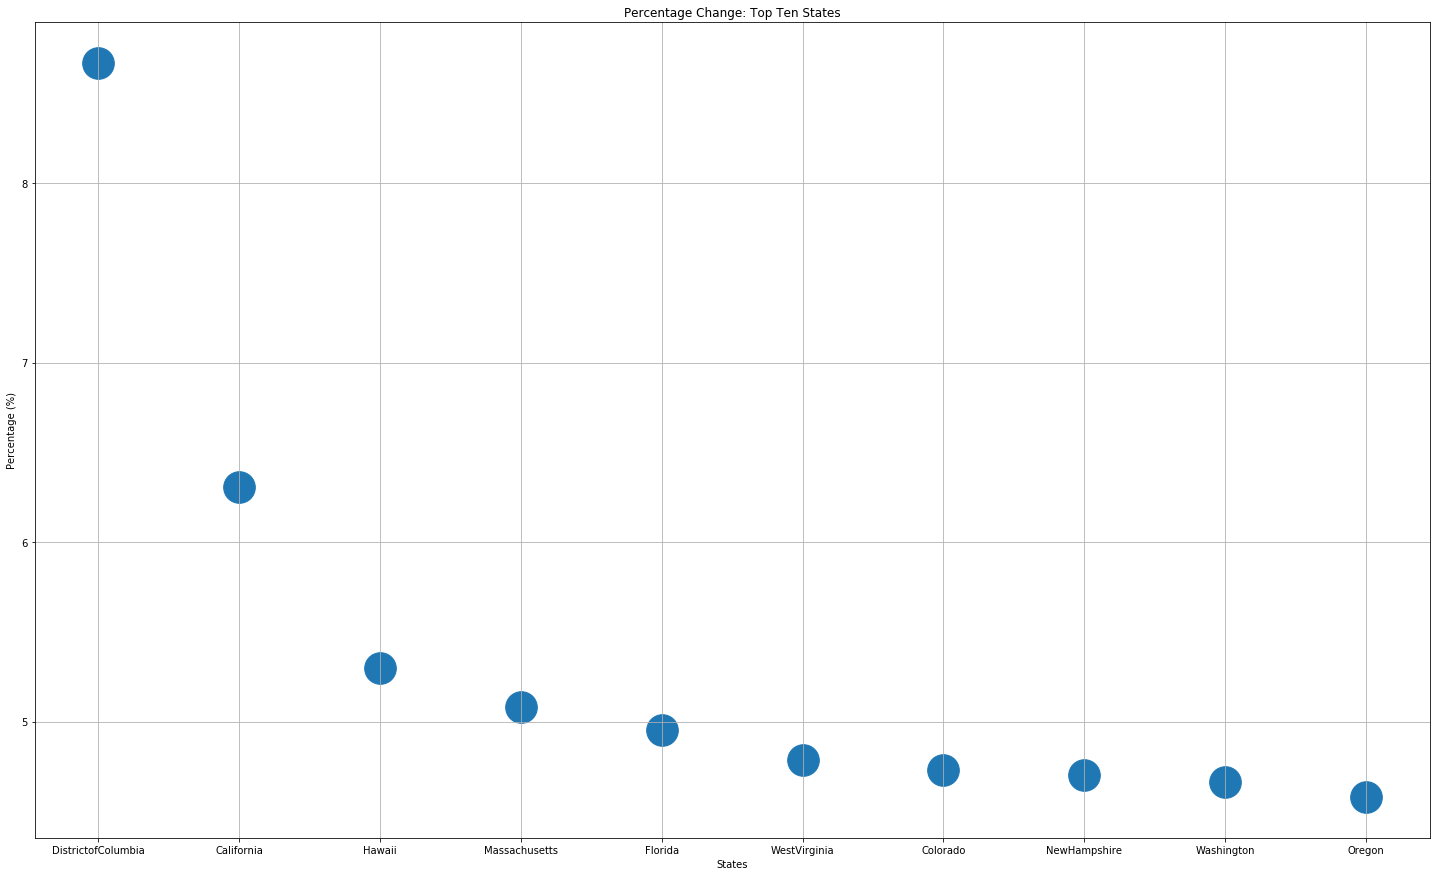

In [62]:
stateperc_df = stateMeanYear_pdf.pct_change()
stateperc_list = stateperc_df.mean()
stateperc_TTlist = stateperc_list.sort_values(ascending=False)[:10]
stateperc_TTlist=stateperc_TTlist*100
# pre-styling scatter plot
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Percentage Change: Top Ten States")
plt.xlabel("States")
plt.ylabel("Percentage (%)")
#  total of 50 states available
# plt.scatter(statesall_mean.sort_values().index[:10], statesall_mean.sort_values()[:10])
plt.scatter(stateperc_TTlist.index,stateperc_TTlist , s=1000)
plt.show()

# Group by County and Neighbourhood

[_] narrowing our scope to county and neighbourhood 

[?] city data not available

[X] state data data analysis/visualization performed above

In [10]:
# file6 = 'zillow/DataDictionary.csv'
# raw6_df = pd.read_csv(file6)
# raw6_df.head()
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 145: invalid start byte

# # group per county etc. file 7,8
# County_time_series.csv
# CountyCrossWalk_Zillow.csv

# # group per neighbourhood etc. file 9
# Neighborhood_time_series.csv
